In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [219]:
# Load trainning data
raw_data = pd.read_csv("/content/sample_data/train.csv")

# Look at the first 5 rows
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

## First let's look at the raw data

In [220]:
# 891 total passengers
raw_data.shape

(891, 12)

In [221]:
# 177 nulls for Age and 687 for Cabin

# calculate the number of missing nulls in each column of raw_data
null_counts = raw_data.isnull().sum()
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


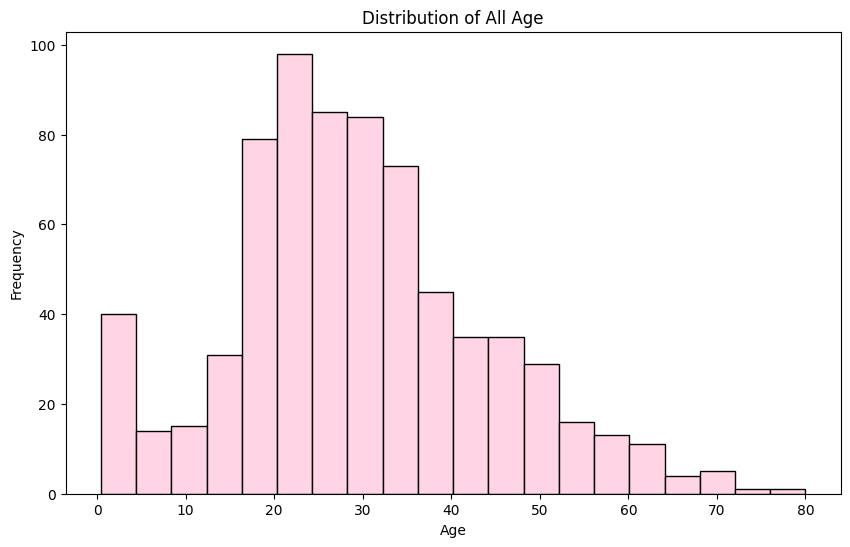

In [222]:
# Histogram of Age distribution

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram for the Age column, excluding all null values
plt.hist(raw_data['Age'].dropna(), bins=20, color= "#ffd4e5", edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of All Age')

# Display the plot
plt.show()

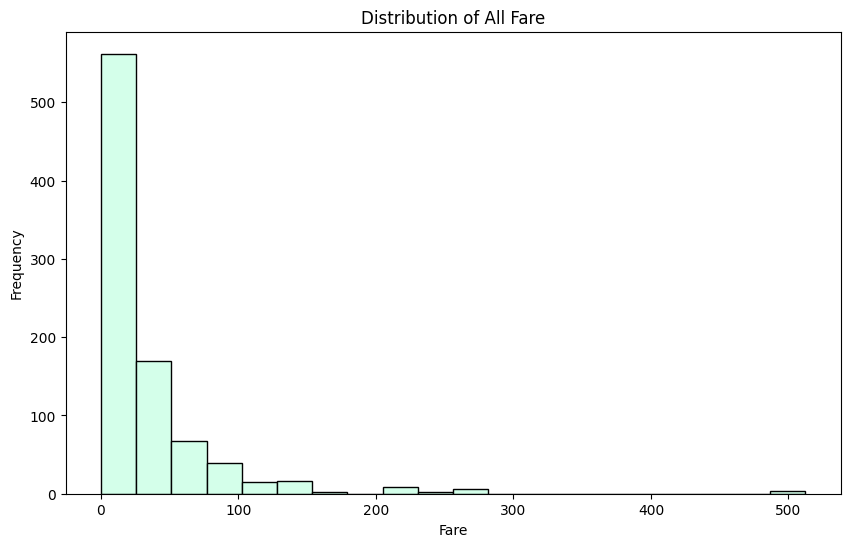

In [223]:
# Histogram of Fare distribution
plt.figure(figsize=(10, 6))
plt.hist(raw_data['Fare'].dropna(), bins=20, color= "#d4ffea", edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of All Fare')
plt.show()

In [224]:
# Count distribution of values in the 'Sex' column
gender_counts = raw_data['Sex'].value_counts()
gender_counts

,count
Sex,
male,577
female,314


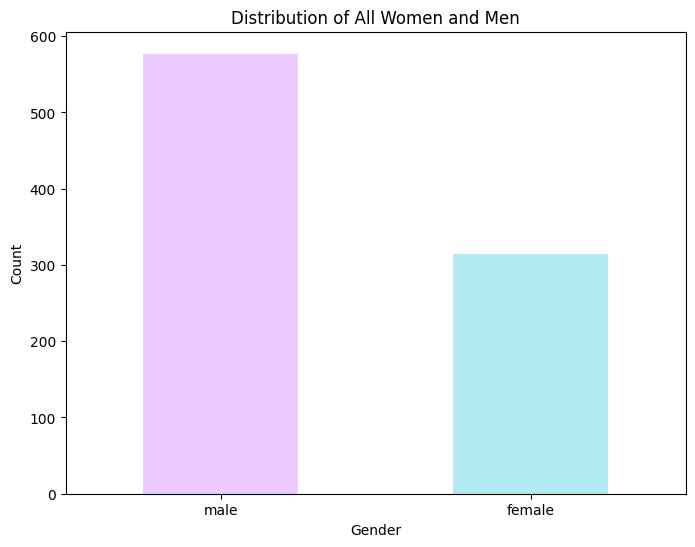

In [225]:
# Plot bar chart for gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['#eecbff', '#b3ebf2'])
plt.title('Distribution of All Women and Men')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Now lets take a look at the survivers

In [226]:
# Filter raw data to include only survivors (Survived == 1)
survivers = raw_data[(raw_data.Survived == 1)]
survivers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [227]:
# we have 342 survivers of the accident
survivers.shape

(342, 12)

In [228]:
# Count the number of men and women in the survivers DataFrame
gender_counts = survivers['Sex'].value_counts()

# Calculate the percentage for each gender
gender_percentages = (gender_counts / len(survivers)) * 100

# 68% of all survivers were women and 32% were men
print(gender_percentages)

Sex
female    68.128655
male      31.871345
Name: count, dtype: float64


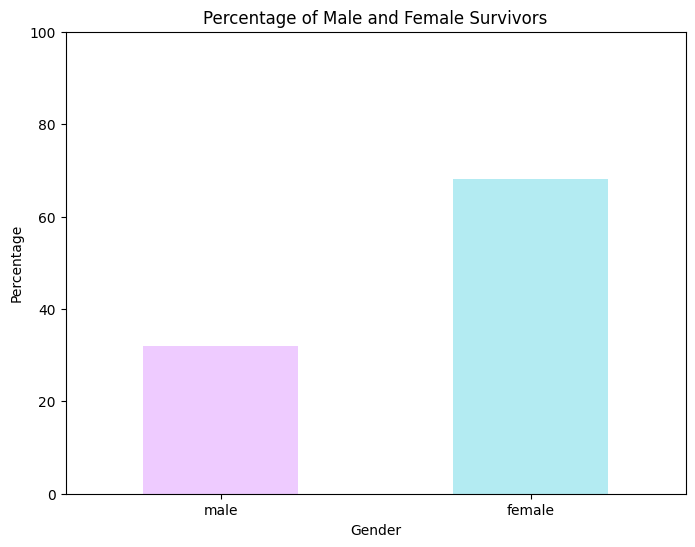

In [229]:
# Plotting the bar chart for gender percentages among survivors
gender_percentages = gender_percentages.reindex(['male', 'female'])

plt.figure(figsize=(8, 6))
gender_percentages.plot(kind='bar', color=['#eecbff', '#b3ebf2'])
plt.title('Percentage of Male and Female Survivors')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Set the limits of the y-axis to range from 0 to 100
plt.ylim(0, 100)

# Set the rotation of x-axis tick labels to 0 and keep the label horitzontal
plt.xticks(rotation=0)

plt.show()

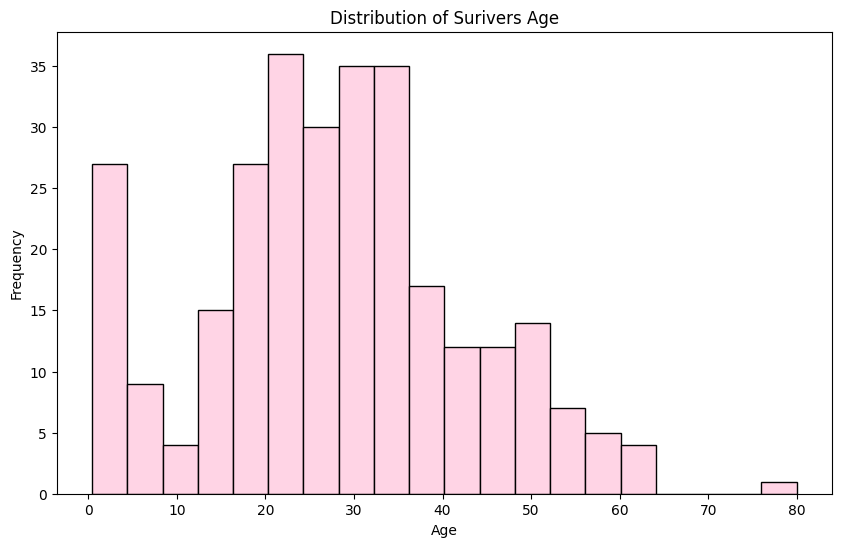

In [230]:
# survivers age distribution
plt.figure(figsize=(10, 6))
plt.hist(survivers['Age'].dropna(), bins=20, color= "#ffd4e5", edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Surivers Age')
plt.show()

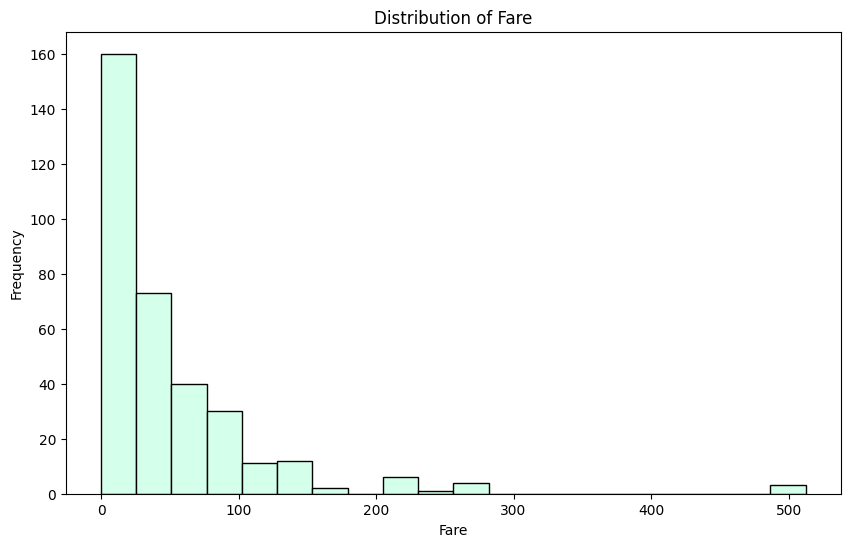

In [231]:
# Histogram of Suvivors' Fare distribution
plt.figure(figsize=(10, 6))
plt.hist(survivers['Fare'].dropna(), bins=20, color= "#d4ffea", edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.show()

In [232]:
# Calculate the median fare in both raw_data and survivers DataFrames
raw_data_median_fare = raw_data['Fare'].median()
survivers_median_fare = survivers['Fare'].median()

# Print the median values for comparison
print("Median Fare in raw_data:", raw_data_median_fare)
print("Median Fare in survivers:", survivers_median_fare)

Median Fare in raw_data: 14.4542
Median Fare in survivers: 26.0


In [233]:
# Calculate the median age in both raw_data and survivers DataFrames
raw_data_median_age = raw_data['Age'].median()
survivers_median_age = survivers['Age'].median()

# Print the median values for comparison
print("Median Age in raw_data:", raw_data_median_age)
print("Median Age in survivers:", survivers_median_age)

Median Age in raw_data: 28.0
Median Age in survivers: 28.0


### Observations:
Passenger with one or more of below characteristics survived at higher rate:
- Females
- With more expensive fare rate

# Pre-processing

In [234]:
# Fill missing values in the 'Age' column with the median of that column
raw_data['Age'].fillna(raw_data['Age'].median(), inplace=True)

<ipython-input-234-0238c376db32>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['Age'].fillna(raw_data['Age'].median(), inplace=True)


In [235]:
# Confirm train_data have 0 nulls for Age
null_counts = raw_data.isnull().sum()
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [236]:
# Identify features for trainning
features = ["Pclass", "Sex", "Age", "SibSp", "Parch",  "Fare", "Embarked"]

# Apply one-hot encoding to catgegorial variables
X = pd.get_dummies(raw_data[features])
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [237]:
# Convert 'Sex_female' and 'Sex_male' columns from boolean to integer (True/False to 1/0)
X['Sex_female'] = X['Sex_female'].astype(int)
X['Sex_male'] = X['Sex_male'].astype(int)

# Convert "Embark" columns from boolean to integer (True/False to 1/0)
X['Embarked_C'] = X['Embarked_C'].astype(int)
X['Embarked_Q'] = X['Embarked_Q'].astype(int)
X['Embarked_S'] = X['Embarked_S'].astype(int)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [238]:
# set y as the target, this tells us who actually survided
y = raw_data["Survived"]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [239]:
# Split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 712 rows and 5 features to train the models
print(X_train.shape)

# 179 rows and 5 features to test the models
print(X_test.shape)

# 712 targets (0 or 1) that will train the model
print(y_train.shape)

# 179 targets used for testing
print(y_test.shape)

(712, 10)
(179, 10)
(712,)
(179,)


In [240]:
# Look at the first five rows
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
683,3,14.0,5,2,46.9000,0,1,0,0,1
496,1,54.0,1,0,78.2667,1,0,1,0,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
124,1,54.0,0,1,77.2875,0,1,0,0,1
653,3,28.0,0,0,7.8292,1,0,0,1,0


In [241]:
y_train.head()

,Survived
683,0
496,1
6,0
124,0
653,1


# Model training and testing

## Logistic Regression

In [252]:
# Initialize the logistic regression model with balanced class weights and increased maximum iterations
log_reg_model = LogisticRegression(class_weight="balanced", max_iter=1000)

# Fir the model on the trainning data (X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy_log_reg = log_reg_model.score(X_test, y_test)
print("Logistic Regression Test accuracy:", accuracy_log_reg)

# Use the trained model to predict the target variable (Survived) value for each observation in X_test
y_pred_log_reg = log_reg_model.predict(X_test)

# Print the classification report
print("")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Test accuracy: 0.770949720670391

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       121
           1       0.64      0.67      0.66        58

    accuracy                           0.77       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.77      0.77      0.77       179



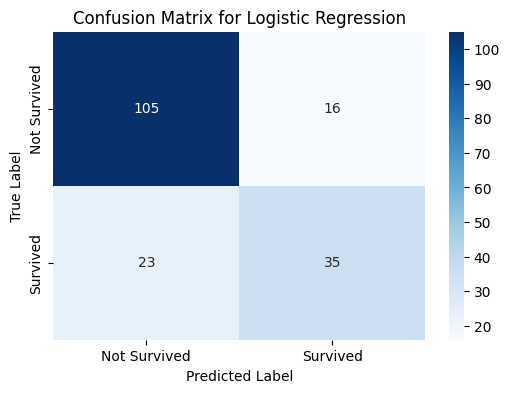

In [243]:
# Generate confusion matrix to compare the actual labels (y_test) with predicted labels (y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Decision Tree

In [256]:
# Initialize deicision tree model with default parameters
decision_tree_model = DecisionTreeClassifier()

# Fit/Train the model using training data
decision_tree_model.fit(X_train, y_train)

Decision Tree Test accuracy: 0.7597765363128491

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       121
           1       0.62      0.66      0.64        58

    accuracy                           0.76       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.76      0.76      0.76       179



In [272]:
# Evaluate the mode's accuracy
accuracy_decision_tree = decision_tree_model.score(X_test, y_test)
print("Decision Tree Test accuracy:", accuracy_decision_tree)

Decision Tree Test accuracy: 0.7597765363128491


In [273]:
# Predict the target values for the test data use the trained model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Print the classification report comparing acutal target value with predicted value
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_decision_tree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       121
           1       0.62      0.66      0.64        58

    accuracy                           0.76       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.76      0.76      0.76       179



## Random Forest

In [267]:
# Initialize Random Forest model with default parameters
random_forest_model = RandomForestClassifier()

# Fit/Train the model with training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [271]:
# Check for model accuracy
accuracy_test_random_forest = random_forest_model.score(X_test, y_test)
print("Random Forest test accuracy: ", accuracy_test_random_forest)

Random Forest test accuracy:  0.7821229050279329


In [270]:
# Predict the target values for the test data use the trained model
y_pred_random_forest = random_forest_model.predict(X_test)

# Print the classification report comparing acutal target value with predicted value
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       121
           1       0.65      0.71      0.68        58

    accuracy                           0.78       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.79      0.78      0.78       179



In [278]:
# Extract random_forest_model feature importances
feature_importances = random_forest_model.feature_importances_
feature_importances

array([0.07465432, 0.24447932, 0.04861764, 0.0356764 , 0.25568294,
       0.15402837, 0.15901327, 0.01024241, 0.0066508 , 0.01095453])

In [279]:
# Create a DataFrame to organize and sort feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
    })

features_df = features_df.sort_values(by='Importance', ascending=False)
features_df

,Feature,Importance
4,Fare,0.255683
1,Age,0.244479
6,Sex_male,0.159013
5,Sex_female,0.154028
0,Pclass,0.074654
2,SibSp,0.048618
3,Parch,0.035676
9,Embarked_S,0.010955
7,Embarked_C,0.010242
8,Embarked_Q,0.006651


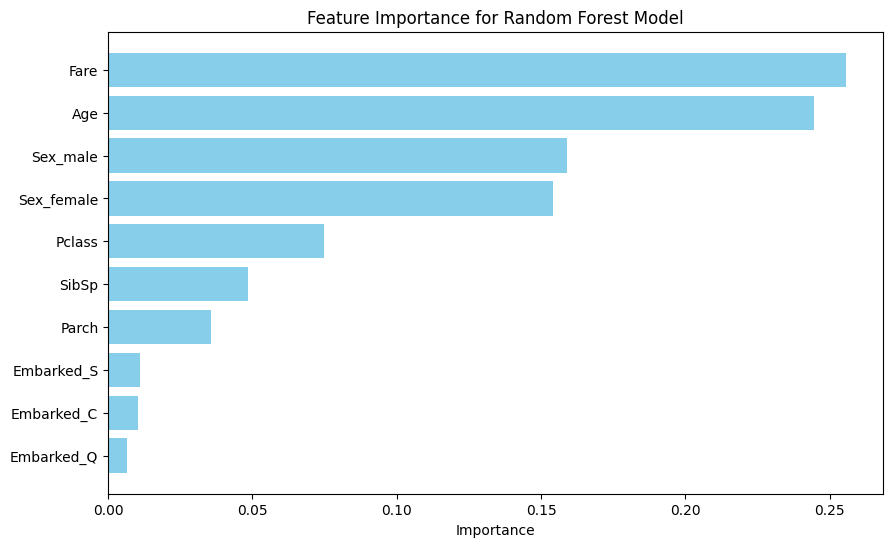

In [280]:
# Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

The chart highlights that Fare, Age, and Gender (Male/Female) were the most influential factors in predicting Titanic survival, with higher fares, younger age, and being female increasing the likelihood of survival. Class and family presence played a moderate role, while the embarkation port had minimal impact. This analysis aligns well with historical accounts, underscoring the importance of socioeconomic factors and the prioritization policies during the Titanic evacuation.